In [ ]:
!pip install --upgrade soundfile librosa

In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=7cc2ff1ee8507867ad3168704e39e28355e0a21e8494b94d7280de1881006265
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
!wget https://www.openslr.org/resources/12/train-clean-100.tar.gz

--2024-04-09 09:20:21--  https://www.openslr.org/resources/12/train-clean-100.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://openslr.elda.org/resources/12/train-clean-100.tar.gz [following]
--2024-04-09 09:20:22--  https://openslr.elda.org/resources/12/train-clean-100.tar.gz
Resolving openslr.elda.org (openslr.elda.org)... 141.94.109.138, 2001:41d0:203:ad8a::
Connecting to openslr.elda.org (openslr.elda.org)|141.94.109.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘train-clean-100.tar.gz’

train-clean-100.tar 100%[===================>]   5.95G  27.1MB/s    in 3m 49s  

2024-04-09 09:24:11 (26.6 MB/s) - ‘train-clean-100.tar.gz’ saved [6387309499/6387309499]



In [ ]:
!tar xzf /content/train-clean-100.tar.gz

In [ ]:
!rm -rf Audio_folder
!mkdir Audio_folder

!cp  /content/LibriSpeech/train/103/1240/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/103/1241/* /content/Audio_folder/

# !cp  /content/LibriSpeech/train/1034/121119/* /content/Audio_folder/

# !cp /content/LibriSpeech/train/1040/133433/* /content/Audio_folder/

# !cp  /content/LibriSpeech/train/1034/121119/* /content/Audio_folder/

!cp  /content/LibriSpeech/train/1069/133699/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/1069/133709/* /content/Audio_folder/

!cp  /content/LibriSpeech/train/1081/125237/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/1081/128618/* /content/Audio_folder/

!cp  /content/LibriSpeech/train/1088/129236/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/1088/134315/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/1088/134318/* /content/Audio_folder/

# !cp  /content/LibriSpeech/train/1098/133695/* /content/Audio_folder/

!cp  /content/LibriSpeech/train/118/121721/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/118/124588/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/118/47824/* /content/Audio_folder/

# !cp  /content/LibriSpeech/train/1183/124566/* /content/Audio_folder/
# !cp  /content/LibriSpeech/train/1183/128659/* /content/Audio_folder/
# !cp  /content/LibriSpeech/train/1183/133255/* /content/Audio_folder/
# !cp  /content/LibriSpeech/train/1183/133256/* /content/Audio_folder/

!cp  /content/LibriSpeech/train/1235/135883/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/1235/135884/* /content/Audio_folder/
!cp  /content/LibriSpeech/train/1235/135887/* /content/Audio_folder/


!rm  /content/Audio_folder/*.txt

In [ ]:
# import os
# import shutil
# import numpy as np
# from sklearn.model_selection import train_test_split
# import soundfile as sf
# import librosa
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import os
import numpy as np
from sklearn.model_selection import train_test_split
import soundfile as sf
import librosa
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Accessing the Data

In [ ]:
# Set the path to the folder containing the audio files
data_folder = '/content/Audio_folder'

# Set the desired number of MFCC coefficients and maximum sequence length
num_coefficients = 13
max_sequence_length = 1000 #maximum sequence length (max_sequence_length) for padding or truncating the MFCC features.

# Create empty lists to store the MFCC features and speaker labels
mfcc_features = []
speaker_labels = []

# Iterate through the audio files in the folder
for filename in os.listdir(data_folder):
    # the format of the file is: speakerID-index.flac
    # Extract the speaker ID from the filename
    speaker_id = filename.split('-')[0]

    # Load the audio file
    audio, sr = sf.read(os.path.join(data_folder, filename))

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_coefficients)

    # Pad or truncate the MFCC features to the maximum sequence length
    if mfcc.shape[1] < max_sequence_length:
        pad_width = max_sequence_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)))
    else:
        mfcc = mfcc[:, :max_sequence_length]

    # Append the MFCC features and speaker label to the lists
    mfcc_features.append(mfcc)
    speaker_labels.append(speaker_id)

More processing

In [ ]:
#Convert the lists to numpy arrays
mfcc_features = np.array(mfcc_features)
speaker_labels = np.array(speaker_labels)

# Split the data into training and testing sets
trainMFCC, testMFCC, trainSpeakerIDs, testSpeakerIDs = train_test_split(
    mfcc_features, speaker_labels, test_size=0.2, random_state=42)

# Reshape the input data
trainMFCC = trainMFCC[..., np.newaxis]
testMFCC = testMFCC[..., np.newaxis]

# Convert speaker IDs to numerical labels
unique_speakers = np.unique(speaker_labels)
num_speakers = len(unique_speakers)
label_to_id = {label: i for i, label in enumerate(unique_speakers)}
trainLabels = np.array([label_to_id[label] for label in trainSpeakerIDs])
testLabels = np.array([label_to_id[label] for label in testSpeakerIDs])

In [ ]:
print(trainLabels.shape)
print(testLabels.shape)
print(trainMFCC.shape)
print(testMFCC.shape)

(571,)
(143,)
(571, 13, 1000, 1)
(143, 13, 1000, 1)


### GRU

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

def build_improved_gru_model(input_shape, num_classes):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Adding a Bidirectional GRU layer
    x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(inputs)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, dropout=0.2, recurrent_dropout=0.2))(x)

    x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)  # Adding dropout for regularization
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

# Adjustments for training
gru_model = build_improved_gru_model((num_coefficients, max_sequence_length), num_speakers)
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_gru_model.h5', monitor='val_accuracy', save_best_only=True)

history = gru_model.fit(
    trainMFCC_reshaped, trainLabels,
    epochs=30,  # Increased epochs
    batch_size=32,
    validation_data=(testMFCC_reshaped, testLabels),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/30
18/18 [==============================] - 23s 368ms/step - loss: 1.9087 - accuracy: 0.2224 - val_loss: 1.6426 - val_accuracy: 0.3357
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 7s 377ms/step - loss: 1.5479 - accuracy: 0.4098 - val_loss: 1.2843 - val_accuracy: 0.6294
Epoch 3/30
18/18 [==============================] - 6s 307ms/step - loss: 1.2901 - accuracy: 0.5412 - val_loss: 1.0545 - val_accuracy: 0.7063
Epoch 4/30
18/18 [==============================] - 7s 387ms/step - loss: 0.9811 - accuracy: 0.6725 - val_loss: 0.8275 - val_accuracy: 0.7762
Epoch 5/30
18/18 [==============================] - 5s 295ms/step - loss: 0.7581 - accuracy: 0.7846 - val_loss: 0.7365 - val_accuracy: 0.7902
Epoch 6/30
18/18 [==============================] - 6s 335ms/step - loss: 0.6075 - accuracy: 0.8301 - val_loss: 0.6991 - val_accuracy: 0.8112
Epoch 7/30
18/18 [==============================] - 6s 310ms/step - loss: 0.5160 - accuracy: 0.8651 - val_loss: 0.6472 - val_accuracy: 0.8392
Epoch 8/30
18/18 [==============================] - 5s 285ms/step - loss: 0.4002 - accuracy: 0.9159 - val_loss: 0.6793 - val_accuracy: 0.8322
Epoch 9/30
18/18 

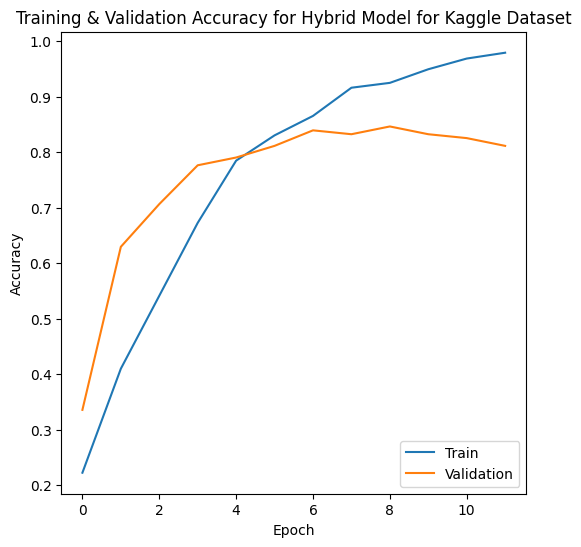

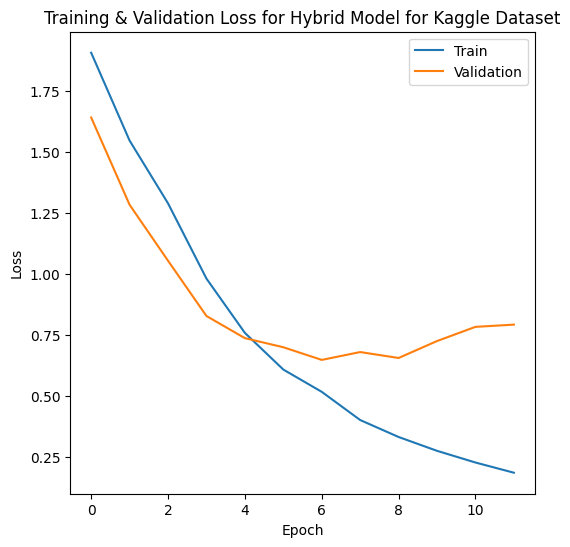

In [ ]:
from matplotlib import pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training & Validation Accuracy for Hybrid Model for Kaggle Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('Accuracy_Graph_Hybrid.png')
plt.show()
# Plot training & validation loss values
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation Loss for Hybrid Model for Kaggle Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('Loss_Graph_Hybrid.png')

plt.show()

5/5 [==============================] - 1s 49ms/step
103: 0.823529411764706
1069: 0.9411764705882353
1081: 0.8636363636363635
1088: 0.9583333333333334
118: 0.6470588235294117
1235: 0.7317073170731707


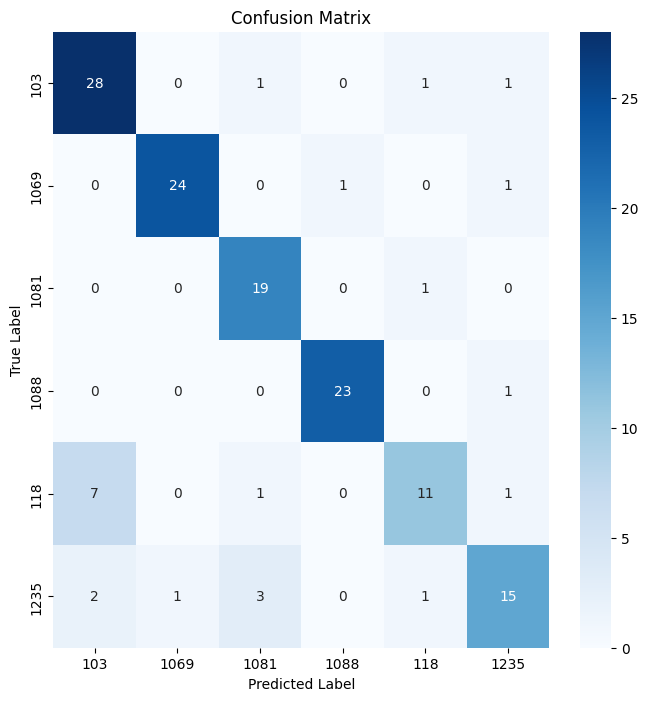


Classification Report:
              precision    recall  f1-score   support

         103       0.76      0.90      0.82        31
        1069       0.96      0.92      0.94        26
        1081       0.79      0.95      0.86        20
        1088       0.96      0.96      0.96        24
         118       0.79      0.55      0.65        20
        1235       0.79      0.68      0.73        22

    accuracy                           0.84       143
   macro avg       0.84      0.83      0.83       143
weighted avg       0.84      0.84      0.83       143



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
predictions = np.argmax(gru_model.predict(testMFCC), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(testLabels, predictions)

# Calculate the classification report
class_names = np.unique(speaker_labels)
report = classification_report(testLabels, predictions, target_names=class_names, output_dict=True)

# Get the F1-score for each class
f1_scores = {label: report[label]['f1-score'] for label in class_names}

# Print the F1-score for each class
for label, f1_score in f1_scores.items():
    print(f"{label}: {f1_score}")

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(testLabels, predictions, target_names=class_names))

### CNN

In [ ]:
# Define the input shape
input_shape = (num_coefficients, max_sequence_length, 1)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(1, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, kernel_size=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, kernel_size=(1, 1), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, kernel_size=(1, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, kernel_size=(1, 1), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_speakers, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainMFCC, trainLabels, epochs=8, batch_size=32, validation_data=(testMFCC, testLabels))

# Evaluate the model
loss, accuracy = model.evaluate(testMFCC, testLabels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/8
18/18 [==============================] - 28s 1s/step - loss: 1.7953 - accuracy: 0.2014 - val_loss: 1.8088 - val_accuracy: 0.1399
Epoch 2/8
18/18 [==============================] - 27s 2s/step - loss: 1.6854 - accuracy: 0.2504 - val_loss: 1.5531 - val_accuracy: 0.2797
Epoch 3/8
18/18 [==============================] - 27s 1s/step - loss: 0.9678 - accuracy: 0.7005 - val_loss: 0.3131 - val_accuracy: 0.8951
Epoch 4/8
18/18 [==============================] - 26s 1s/step - loss: 0.4710 - accuracy: 0.8354 - val_loss: 0.1590 - val_accuracy: 0.9860
Epoch 5/8
18/18 [==============================] - 25s 1s/step - loss: 0.3729 - accuracy: 0.8774 - val_loss: 0.1638 - val_accuracy: 0.9720
Epoch 6/8
18/18 [==============================] - 25s 1s/step - loss: 0.2194 - accuracy: 0.9282 - val_loss: 0.1214 - val_accuracy: 0.9860
Epoch 7/8
18/18 [==============================] - 25s 1s/step - loss: 0.1419 - accuracy: 0.9685 - val_loss: 0.0988 - val_accuracy: 0.9650
Epoch 8/8
5/5 [============

5/5 [==============================] - 1s 290ms/step
103: 1.0
1069: 1.0
1081: 1.0
1088: 1.0
118: 0.9473684210526316
1235: 0.9565217391304348


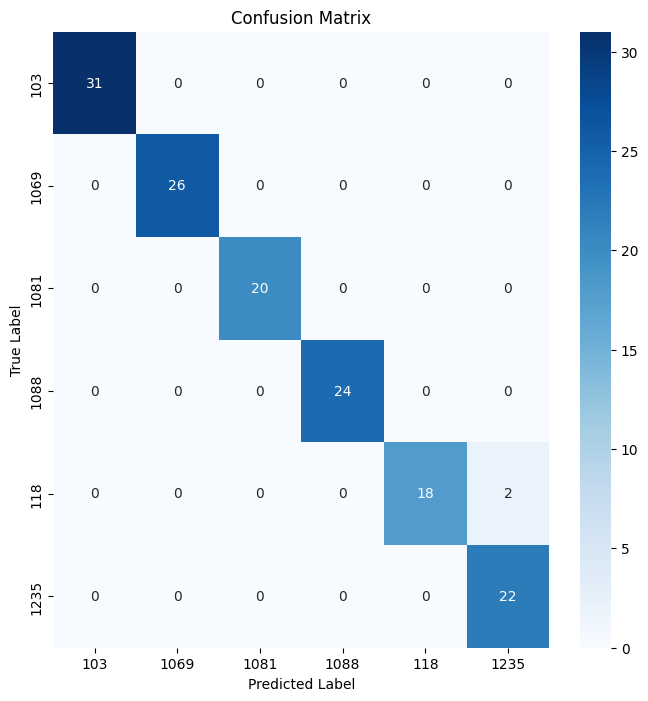


Classification Report:
              precision    recall  f1-score   support

         103       1.00      1.00      1.00        31
        1069       1.00      1.00      1.00        26
        1081       1.00      1.00      1.00        20
        1088       1.00      1.00      1.00        24
         118       1.00      0.90      0.95        20
        1235       0.92      1.00      0.96        22

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
predictions = np.argmax(model.predict(testMFCC), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(testLabels, predictions)

# Calculate the classification report
class_names = np.unique(speaker_labels)
report = classification_report(testLabels, predictions, target_names=class_names, output_dict=True)

# Get the F1-score for each class
f1_scores = {label: report[label]['f1-score'] for label in class_names}

# Print the F1-score for each class
for label, f1_score in f1_scores.items():
    print(f"{label}: {f1_score}")

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(testLabels, predictions, target_names=class_names))